# AIM : To apply hyperparameter tuning to ML Algorithm and analyse the impact

**Name : Trideep Nandi**

**Class : CS4**

**Batch: 2**

**Enrollment : 0827CS211248**

# Hyperparameter Tuning in Machine Learning

#### Introduction

Hyperparameter tuning is a crucial step in the process of building a machine learning model. Hyperparameters are parameters whose values are set before the learning process begins. Unlike model parameters, they cannot be learned from the data during training and must be predefined. 

Hyperparameters can be thought of as the settings of an algorithm that can be adjusted to optimize performance. Some examples of hyperparameters include the learning rate for models that learn from gradient descent, the depth of a decision tree, and the k in k-nearest neighbors.

The process of hyperparameter tuning involves selecting the combination of hyperparameters for a learning algorithm that performs the best - as measured on a validation set - for a particular problem. Hyperparameter tuning can result in significant improvements in model performance by finding a set of optimal hyperparameters for a learning algorithm. 

However, it's important to note that there's no one-size-fits-all set of optimal hyperparameters for a given algorithm since the optimal settings often depend on the specific characteristics of the data. Therefore, hyperparameter tuning is typically performed for each machine learning problem individually.



#### Problem Statement

In this notebook, we will be demonstrating the impact of hyperparameter tuning on a Ridge Regression model using the Diabetes dataset from sklearn.

#### Loading the Dataset

We start by loading the Diabetes dataset from sklearn. This dataset is used to predict a quantitative measure of disease progression one year after baseline.

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
# Load the Diabetes dataset
X, y = load_diabetes(return_X_y=True)


#### Splitting the Dataset

We then split the dataset into training and testing sets. This is an important step for model validation.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model without Hyperparameter Tuning

We first train a Ridge Regression model without any hyperparameter tuning. We then calculate and display the Mean Squared Error (MSE) to evaluate the model's performance.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [6]:
# Define the model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3077.41593882723


#### Model with Hyperparameter Tuning

Next, we perform hyperparameter tuning using GridSearchCV. GridSearchCV is a method used to tune our hyperparameters. We provide it with the hyperparameters, and the values it needs to experiment with, and it will use cross-validation to evaluate the performance.

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse_h = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_h)


Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error: 2856.4868876706546


#### Analysis

Finally, we compare the performance of the model with and without hyperparameter tuning. We discuss the impact of hyperparameter tuning on the model's performance. In this case, the MSE decreased after hyperparameter tuning, indicating an improvement in the model's performance.

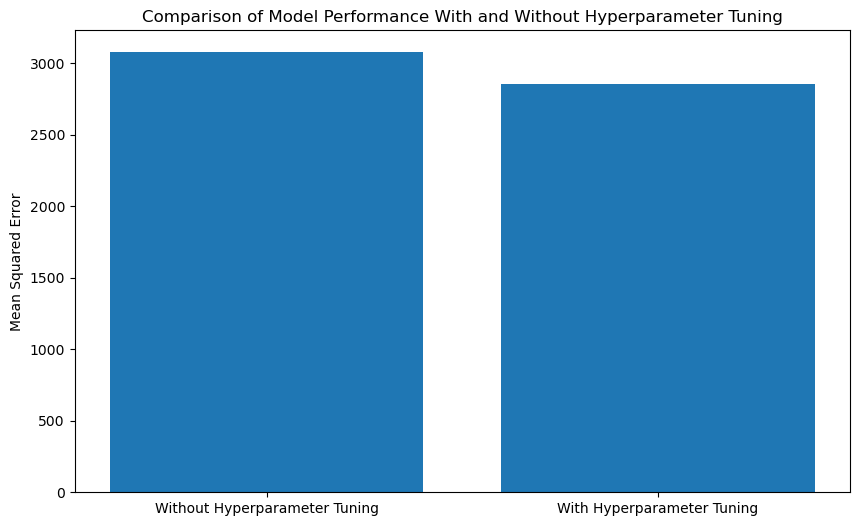

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(['Without Hyperparameter Tuning', 'With Hyperparameter Tuning'], [mse, mse_h])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Performance With and Without Hyperparameter Tuning')
plt.show()